# do I understand Gaussian process regression?

In [165]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

SIGMA = 2

set up kernel func

In [166]:
def k(x, y, sigma=SIGMA):
    # radial basis kernel wrt. x, y.
    return torch.exp( -(torch.abs(x - y)**2) / (2 * sigma**2) )

In [167]:
k(torch.tensor([1, 2, 3, 4]), 3)

tensor([0.6065, 0.8825, 1.0000, 0.8825])

set up iteration w/ priors

In [168]:
def Sigma(Xs, sigma=SIGMA):
    # build the covariance matrix guess
    V, H = torch.meshgrid(Xs, Xs, indexing='ij')
    return k(V, H, sigma)
    

generate some toy data

<Axes: xlabel='None', ylabel='None'>

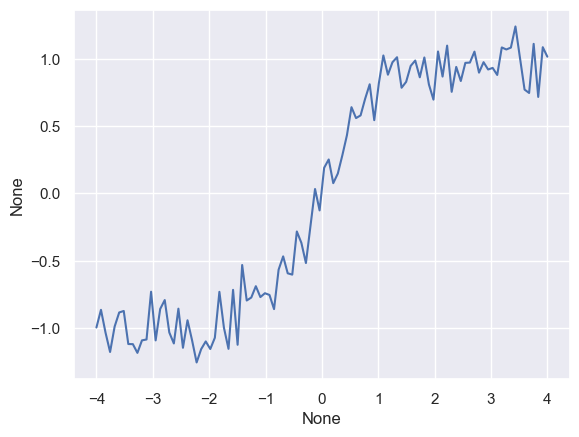

In [169]:
n = 100

xs = torch.linspace(-4, 4, n)
ys = F.tanh(xs) + (torch.randn(n) / 8)

sns.lineplot(x=xs, y=ys)

let's make some predictions

In [348]:
U, S, V = torch.svd(covariance)

In [347]:
covariance.inverse()

tensor([[ 7.6994e+04,  1.8531e+05,  1.2943e+06,  1.6290e+05, -1.4946e+04,
          9.8234e+03, -1.1474e+06, -8.4490e+03, -2.1166e+05, -3.4687e+05],
        [ 1.8527e+05,  1.9000e+06,  2.6472e+06,  1.7269e+06, -4.5791e+04,
          4.8955e+04, -2.3845e+06, -4.8181e+04, -4.1291e+05, -3.6166e+06],
        [ 1.2942e+06,  2.6488e+06,  2.2668e+07,  2.3257e+06, -2.3902e+05,
          1.4709e+05, -2.0010e+07, -1.2497e+05, -3.7556e+06, -4.9552e+06],
        [ 1.6289e+05,  1.7271e+06,  2.3245e+06,  1.5726e+06, -4.0353e+04,
          4.3448e+04, -2.0940e+06, -4.2882e+04, -3.6244e+05, -3.2904e+06],
        [-1.4945e+04, -4.5777e+04, -2.3903e+05, -4.0336e+04,  3.0998e+03,
         -2.2465e+03,  2.1297e+05,  1.9701e+03,  3.8501e+04,  8.5790e+04],
        [ 9.8197e+03,  4.8915e+04,  1.4703e+05,  4.3408e+04, -2.2460e+03,
          1.9647e+03, -1.3185e+05, -1.8031e+03, -2.3233e+04, -9.1999e+04],
        [-1.1474e+06, -2.3858e+06, -2.0010e+07, -2.0950e+06,  2.1297e+05,
         -1.3191e+05,  1.7672e+0

In [351]:
U

tensor([[-4.4537e-01,  1.1956e-01,  2.8242e-02,  2.9982e-01,  5.9636e-01,
         -3.4028e-01,  2.8420e-02,  4.7188e-01,  6.9231e-04, -4.1832e-02],
        [-9.4735e-02, -4.9992e-01,  2.5541e-01,  4.4255e-02,  8.4384e-02,
          2.8498e-01, -6.2334e-01,  1.2217e-01, -4.1531e-01, -9.8069e-02],
        [-4.3283e-01,  1.4885e-01,  1.7640e-01, -2.2501e-01, -3.4528e-02,
         -6.1407e-02, -1.0492e-01, -3.7257e-01,  1.7370e-01, -7.2374e-01],
        [-9.0617e-02, -4.9302e-01,  2.8333e-01,  8.9894e-02, -1.3417e-01,
         -3.0798e-01,  6.1446e-01, -1.3132e-01, -3.8109e-01, -8.6499e-02],
        [-3.8353e-01,  1.8244e-02, -2.8055e-01,  7.1581e-01, -2.7605e-01,
          3.8091e-01,  7.6801e-02, -1.8500e-01,  3.0005e-03,  7.8691e-03],
        [-2.0994e-01, -2.5985e-01, -5.8742e-01, -1.5062e-01, -4.0461e-01,
         -5.1279e-01, -2.6402e-01,  1.5559e-01, -7.4786e-03, -5.0380e-03],
        [-4.3656e-01,  1.4764e-01,  1.6561e-01, -1.7405e-01,  7.3928e-02,
         -1.6208e-01, -1.6419e-0

In [350]:
torch.isclose(V.mT @ torch.diag(S**-1) @ U.mT, covariance.inverse())

tensor([[False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False]])

In [378]:
covariance.shape

torch.Size([10, 10])

In [369]:
Kstar.shape

torch.Size([100, 10])

In [384]:
so = torch.linalg.solve(covariance, Kstar.permute(1, 0)).mT
so.shape

torch.Size([100, 10])

In [389]:
torch.einsum('ij,j->i', so, ytr)

tensor([-0.5667, -0.6877, -0.7770, -0.8367, -0.8748, -0.8986, -0.9056, -0.9068,
        -0.9008, -0.8983, -0.8948, -0.9001, -0.9049, -0.9237, -0.9460, -0.9765,
        -1.0155, -1.0539, -1.1024, -1.1453, -1.1841, -1.2223, -1.2468, -1.2664,
        -1.2599, -1.2471, -1.2145, -1.1618, -1.0873, -0.9827, -0.8719, -0.7404,
        -0.5831, -0.4145, -0.2373, -0.0589,  0.1477,  0.3378,  0.5295,  0.7077,
         0.8772,  1.0368,  1.1492,  1.2575,  1.3286,  1.3831,  1.3996,  1.3893,
         1.3633,  1.2930,  1.2238,  1.1201,  1.0072,  0.8926,  0.7627,  0.6304,
         0.5462,  0.4427,  0.3867,  0.3377,  0.3206,  0.3584,  0.4587,  0.5606,
         0.7033,  0.9348,  1.1957,  1.4736,  1.8119,  2.1624,  2.5326,  2.9524,
         3.3094,  3.7056,  4.0978,  4.4414,  4.7636,  5.0639,  5.2341,  5.4250,
         5.5221,  5.5454,  5.5118,  5.3912,  5.2296,  4.9477,  4.6307,  4.2846,
         3.8990,  3.4440,  2.9725,  2.5769,  2.0889,  1.7465,  1.4016,  1.1258,
         0.9719,  0.9469,  1.0706,  1.36

k(Sigma) = 631.99462890625 = exp 6.448880895544685


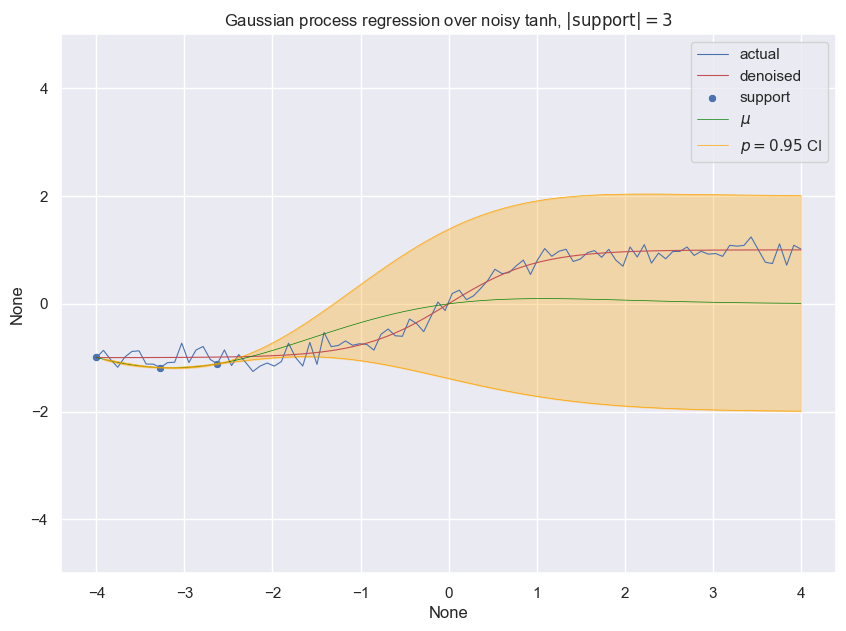

In [182]:
knots = 3

idxs = torch.randint(0, xs.shape[0], (knots,))

xtr = xs[idxs]
ytr = ys[idxs]
Kstar = k(xs[:, None], xtr)

covariance = Sigma(xtr)
kappa = torch.linalg.cond(covariance).item()
print(f'k(Sigma) = {kappa} = exp {np.log(kappa)}')

# In the nonsingular case, this is exact. In the singular case,
# we get the OLS solution.
# Use least squares to be robust against \sigma_i == 0 -- we don't use
# the pseudoinverse for stability reasons.
Ks_cov = torch.linalg.lstsq(covariance, Kstar.permute(1, 0), driver='gelsd').solution.mT

means = Ks_cov @ ytr
variances = k(xs, xs) - torch.einsum("ij,ij->i", Ks_cov, Kstar)

stddevs = variances**0.5
lower = means - 2*stddevs
upper = means + 2*stddevs
plt.figure(figsize=(10, 7))

sns.lineplot(x=xs, y=ys, label='actual', color='b', linewidth=0.8)
sns.lineplot(x=xs, y=F.tanh(xs), label='denoised', color='r', linewidth=0.8)
sns.scatterplot(x=xtr, y=ytr, label='support', color='b', sizes=(5000,))
sns.lineplot(x=xs, y=means, label=r'$\mu$', color='green', linewidth=0.5)
sns.lineplot(x=xs, y=lower, label=r'$p=0.95$ CI', color='orange', linewidth=0.5)
c = sns.lineplot(x=xs, y=upper, color='orange', linewidth=0.5)

line = c.get_lines()
plt.fill_between(
    line[3].get_xdata(), 
    line[4].get_ydata(),
    line[3].get_ydata(), 
    color='orange',
    alpha=0.3,
)

plt.title(r"Gaussian process regression over noisy tanh, $|\text{support}| = " + f"{knots}" + r"$")

c.set_ylim(-5, 5);